<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/COMPLETE_Medical_Insurance_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

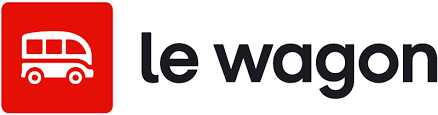

# Non-linear model

In the following challenge, we'll try to predict medical insurance charges based on certain factors!

While we're sure you find that premise interesting, the important part of this challenge is not the data, it's the modelling! We'll try to implement some **new** models that we haven't seen before.

Remember one thing: the goal of this challenge is not to give you an understanding of the mathematical intricacies of these models - that's the job of a data scientist. However, we want to show you just how easy these models are to code and how friendly the SKLearn Library is!

## Import the data

Go to [this](https://www.kaggle.com/datasets/mirichoi0218/insurance) link and download the medical insurance charges dataset. Load it into a dataframe!

In [13]:
!pip install gdown
import gdown
import pandas as pd

# Load the data into a DataFrame #
insurance_df = pd.read_csv('insurance.csv')

# Display the first few rows of the DataFrame #
insurance_df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocessing

Before doing any preprocessing let's build our baseline.

Firstly as there are categorical variables, we'll encode these with OHE.

Split into X and y

Choose the appropriate columns to assign to the X and y variables!

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the data into a DataFrame #
insurance_df = pd.read_csv('insurance.csv')

# Split into features (X) and target variable (y) #
X = insurance_df[['age', 'bmi', 'children', 'sex', 'smoker', 'region']]
y = insurance_df['charges']

# Define the columns to be one-hot encoded #
categorical_cols = ['sex', 'smoker', 'region']

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns #
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data #
X_encoded = preprocessor.fit_transform(X)

# Display the first few rows of the transformed X #
print("Encoded features (X):")
print(X_encoded[:5])



Encoded features (X):
[[ 0.     1.     0.     0.     1.    19.    27.9    0.   ]
 [ 1.     0.     0.     1.     0.    18.    33.77   1.   ]
 [ 1.     0.     0.     1.     0.    28.    33.     3.   ]
 [ 1.     0.     1.     0.     0.    33.    22.705  0.   ]
 [ 1.     0.     1.     0.     0.    32.    28.88   0.   ]]


### Train-test split

Split your data now, into train and test variables (80/20)!

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with an 80/20 ratio #
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets #
print("Training set - X shape:", X_train.shape, "y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape, "y shape:", y_test.shape)


Training set - X shape: (1070, 8) y shape: (1070,)
Testing set - X shape: (268, 8) y shape: (268,)


### Baseline

Here take only the numerical features and use a Linear Regression.

Think about the metric we need to use to evaluate our models.

<details>
<summary>Hint 1:</summary>

We are in a regression problem.
</details>
<details>
<summary>Hint 2:</summary>

You can look on scikit learn [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).</details>

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Select only the numerical features for training #
X_train_numerical = X_train[:, :5]  # Selecting the first 5 columns which are the numerical features

# Initialize and train the Linear Regression model #
linear_reg = LinearRegression()
linear_reg.fit(X_train_numerical, y_train)

# Predict on the testing set using the trained model #
X_test_numerical = X_test[:, :5]  # Selecting the same numerical features for testing
y_pred = linear_reg.predict(X_test_numerical)

# Calculate the Mean Absolute Error (MAE) to evaluate the model #
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 5656.871602732169


Now our baseline is build let's do our preprocessing and see if we can decrease the model error.

### Scaling

Like in the previous exercise, we'll have to scale the numerical **and** non-numerical columns!

### Numerical values & Non-numerical values as have used OHE

Scale the numerical values - remember from the last challenge what we did to select only the relevant columns.

<details>
    <summary><i>Hint:</i></summary>
You have to fit it on the train and not on the test.
</details>

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data #
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)

# Now X_train_numerical_scaled and X_test_numerical_scaled contain the scaled numerical features #


What is the number of columns of each 'X_train_cat' and 'X_test_cat'?
<details>
 <summary><i>Answer:</i></summary>
 You are suppose to have 8 columns.
</details>

In [20]:
# Find the number of columns in X_train_cat #
num_cols_train = X_train.shape[1]

# Find the number of columns in X_test_cat #
num_cols_test = X_test.shape[1]

print("Number of columns in X_train_cat:", num_cols_train)
print("Number of columns in X_test_cat:", num_cols_test)


Number of columns in X_train_cat: 8
Number of columns in X_test_cat: 8


### Rebuild X!

Concat your numerical and non-numerical Xs into one! Store it in 'X_train_preproc' and 'X_test_preproc'

Check if you have nan in your dataframes.
<details>
    <summary>Hint:</summary>
If you have nan in it is because of the way `pd.get_dummies` works. It is not reset the index of your dataframe and so you have different index for the concatenation.
<details>
<summary>Answer:</summary>
You have to use `pd.reset_index` on your categorical dataframes.
</details>
</details>

In [27]:
# Store the encoded categorical features from X_train and X_test into X_train_cat and X_test_cat, respectively
X_train_cat = X_train[:, 5:]  # Assuming the numerical features are at the beginning and categorical at the end
X_test_cat = X_test[:, 5:]    # Assuming the numerical features are at the beginning and categorical at the end




In [28]:
import numpy as np

# Concatenate the scaled numerical features with the encoded categorical features
X_train_preproc = np.concatenate((X_train_numerical_scaled, X_train_cat), axis=1)
X_test_preproc = np.concatenate((X_test_numerical_scaled, X_test_cat), axis=1)

# Display the shapes of the preprocessed training and testing sets
print("Shape of X_train_preproc:", X_train_preproc.shape)
print("Shape of X_test_preproc:", X_test_preproc.shape)


Shape of X_train_preproc: (1070, 8)
Shape of X_test_preproc: (268, 8)


## Modelling!

It's time to do some modelling, only this time, we're going beyond Linear Regressions!

### Linear Regression

Perform a Linear Regression on the data!

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize the Linear Regression model #
linear_reg_model = LinearRegression()

# Fit the model on the training data #
linear_reg_model.fit(X_train_preproc, y_train)

# Predict on the testing data #
y_pred = linear_reg_model.predict(X_test_preproc)



Now, calculate the MAE of your Linear Regression!

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE) to evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on testing data:", mae)


Mean Absolute Error (MAE) on testing data: 4181.194473753644


We divide our error by more than 2. As you can see the preprocessing is really important if you want modelling.

Be sure everything before is **understanding** before start the optional.

# Optional

Choosing the appropriate model can also reduce errors. There are various types of models available for regression let's try a few!

### Trees - Random Forest Regression

Now we're getting a bit more complex! Look up the sklearn documentation for the `RandomForestRegressor` and see how you could implement it for our dataset!

Don't spend too much time trying to understand how this model works under the hood, that's not the purpose here. However, if you're curious, watch [this short video](https://www.youtube.com/watch?v=gkXX4h3qYm4) from IBM that explains the basics.

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train_preproc, y_train)

RandomForestRegressor()

Now it's time to calculate the MAE of the Random Forest model.

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the Random Forest Regression model #
rfr = RandomForestRegressor()

# Fit the model on the training data #
rfr.fit(X_train_preproc, y_train)

# Predict on the testing data #
y_pred_rfr = rfr.predict(X_test_preproc)

# Calculate the Mean Absolute Error (MAE) to evaluate the model #
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
print("Mean Absolute Error (MAE) for Random Forest Regression:", mae_rfr)


Mean Absolute Error (MAE) for Random Forest Regression: 2595.511473244954


### Support Vector Machine

Same drill as last time, only now we're trying the `Support Vector Regressor`. Again, look up the documentation of this model and implement it below.

[Here's](https://www.youtube.com/watch?v=_YPScrckx28) a very short video that explains the idea behind SVM's. Don't dwell too much on trying to understand how it works, only the basics!

In [38]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Initialize the SVR model #
svr = SVR()

# Fit the model on the training data #
svr.fit(X_train_preproc, y_train)

# Predict on the testing data #
y_pred_svr = svr.predict(X_test_preproc)

# Calculate the Mean Absolute Error (MAE) to evaluate the model #
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error (MAE) for Support Vector Machine Regression:", mae_svr)


Mean Absolute Error (MAE) for Support Vector Machine Regression: 8597.048001247427


Let's calculate the MAE now!

Done above!

### Your own model

Look through the SKLearn documentation to find another regression model and try your best to implement it. How does it perform?

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the Decision Tree Regression model #
dt_reg = DecisionTreeRegressor()

# Fit the model on the training data #
dt_reg.fit(X_train_preproc, y_train)

# Predict on the testing data #
y_pred_dt = dt_reg.predict(X_test_preproc)

# Calculate the Mean Absolute Error (MAE) to evaluate the model #
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error (MAE) for Decision Tree Regression:", mae_dt)


Mean Absolute Error (MAE) for Decision Tree Regression: 3187.590569126866


Calculate the error of your model!

Mean Absolute Error (MAE) for Decision Tree Regression: 3187.590569126866

## Conclusions

The results are in! The model that perfomed best was the random forest, followed by the linear regression and trailing in last place, the SVR! This goes to show that the most complex models are not always the best!

How did your model do?

**A little caveat:** this was a very simplistic implementation of what are complex models. In a more realistic scenario, a data scientist would have spent a considerable portion of their time on finetuning these models to improve their performance. In this challenge, the purpose was not to do that, but rather to show how easy the Sci-Kit Learn Library is to use!